In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [88]:
df = pd.read_csv('C:/Users/Micha/Desktop/Data Analysis Practice/COVID-19 Data Project/COVID-19 Project Dataset.csv')


In [89]:
df['date'] = pd.to_datetime(df['date'])

In [90]:
usa_df = df.loc[df['location'] == 'United States']

In [91]:
usa_df = usa_df.resample('W', on='date').mean()

In [92]:
usa_df = usa_df[['new_cases', 'new_deaths', 'icu_patients', 'total_vaccinations']]

In [93]:
usa_df[['new_cases', 'new_deaths', 'icu_patients']].describe()

,new_cases,new_deaths,icu_patients
count,152.000,147.000,127.000
mean,94108.134,1059.477,10874.592
std,118328.942,778.105,7934.884
min,0.286,0.500,1464.857
25%,35806.107,428.929,3802.786
50%,63204.071,795.143,9085.571
75%,112135.964,1591.714,15743.500
max,805867.286,3334.429,28473.857


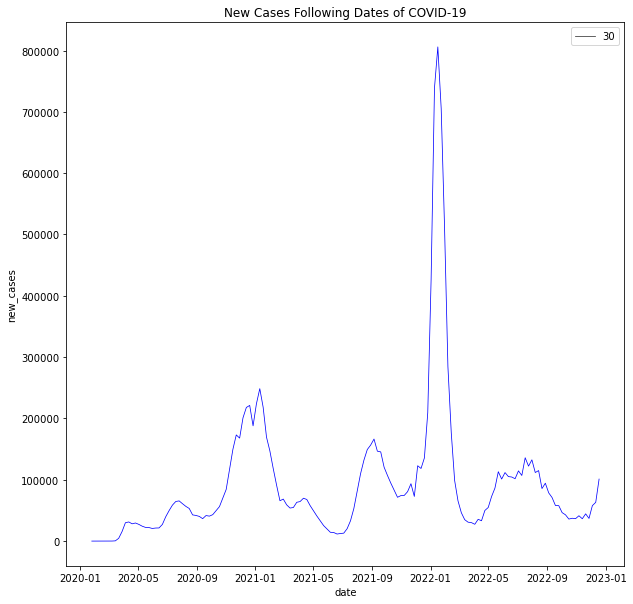

In [94]:
plt.figure(figsize=(10,10))
sns.lineplot(data = usa_df,x='date', y='new_cases', size=30, color='blue')
plt.title('New Cases Following Dates of COVID-19')
plt.show()


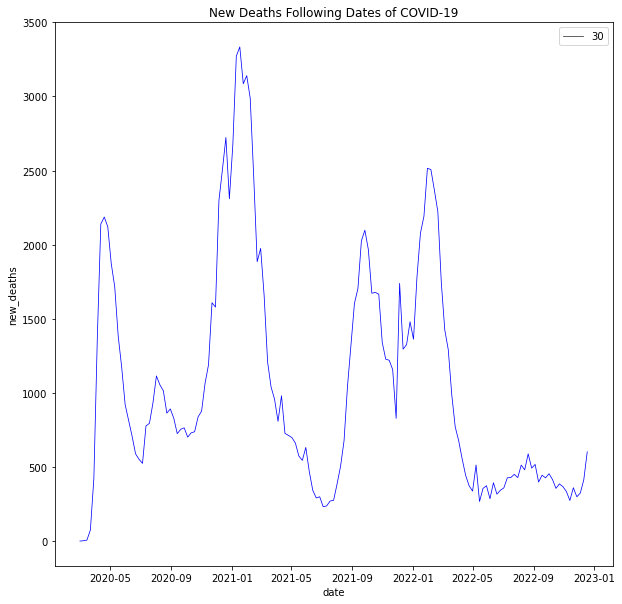

In [95]:
plt.figure(figsize=(10,10))
sns.lineplot(data = usa_df,x='date', y='new_deaths', size=30, color='blue')
plt.title('New Deaths Following Dates of COVID-19')
plt.show()


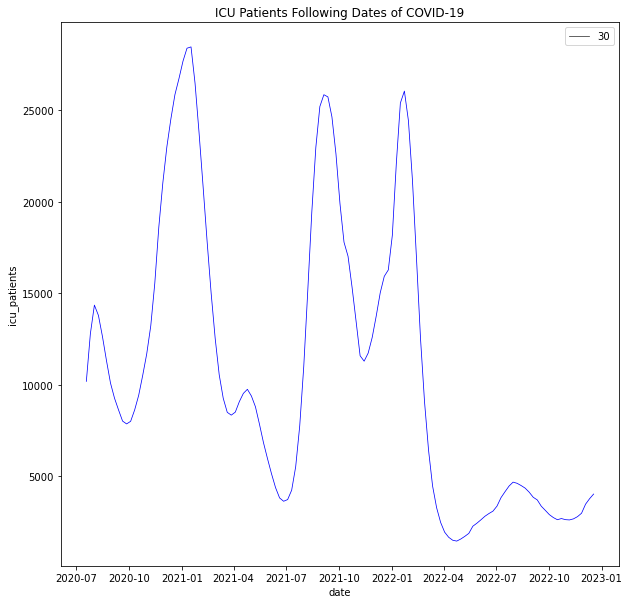

In [96]:
plt.figure(figsize=(10,10))
sns.lineplot(data = usa_df,x='date', y='icu_patients', size=30, color='blue')
plt.title('ICU Patients Following Dates of COVID-19')
plt.show()

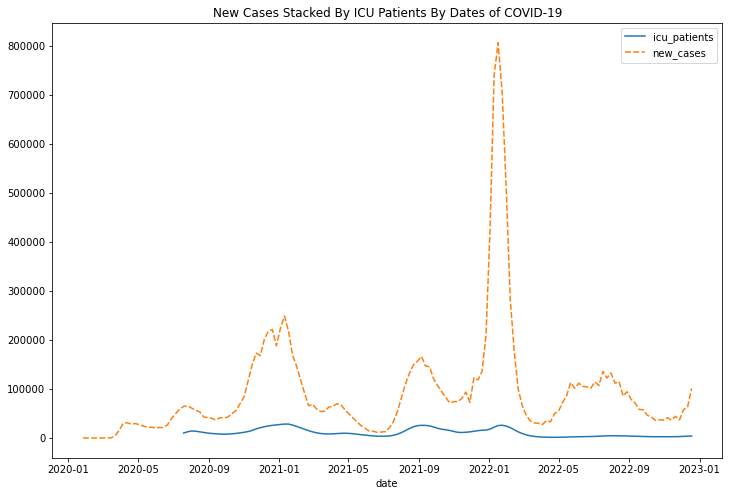

In [97]:
plt.figure(figsize=(12,8))
sns.lineplot(data=usa_df[['icu_patients', 'new_cases']])
plt.title('New Cases Stacked By ICU Patients By Dates of COVID-19')
plt.show()

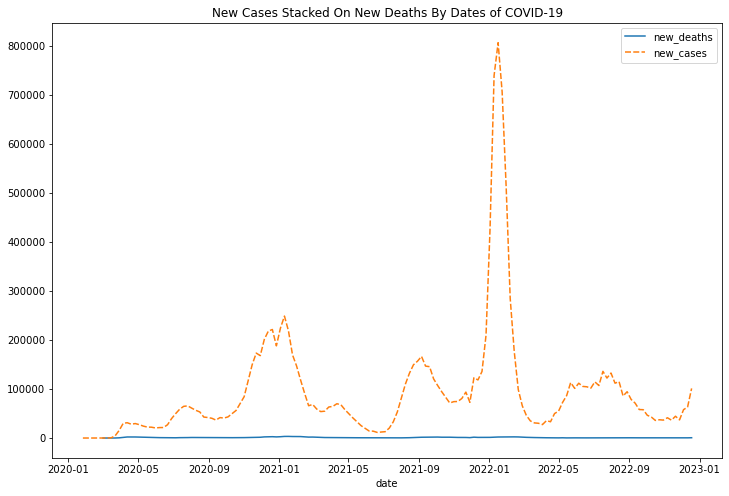

In [98]:
plt.figure(figsize=(12,8))
sns.lineplot(data=usa_df[['new_deaths', 'new_cases']])
plt.title('New Cases Stacked On New Deaths By Dates of COVID-19')
plt.show()

In [60]:
copy_df = df.loc[df['location'] == 'United States']


In [61]:
copy_grouped = copy_df.groupby([copy_df['date'].dt.year, copy_df['date'].dt.month]).sum()
copy_grouped = copy_grouped[['new_cases', 'new_deaths', 'icu_patients']]

In [62]:
copy_grouped = copy_grouped.rename_axis(["year", "month"])

In [63]:
copy_grouped = copy_grouped.reset_index()

In [64]:
copy_grouped.head()

,year,month,new_cases,new_deaths,icu_patients
0,2020,1,7.000,0.000,0.000
1,2020,2,17.000,1.000,0.000
2,2020,3,192054.000,5358.000,0.000
3,2020,4,888920.000,61276.000,0.000
4,2020,5,709872.000,41211.000,0.000


In [65]:
palette = ["red", "blue", "green"]

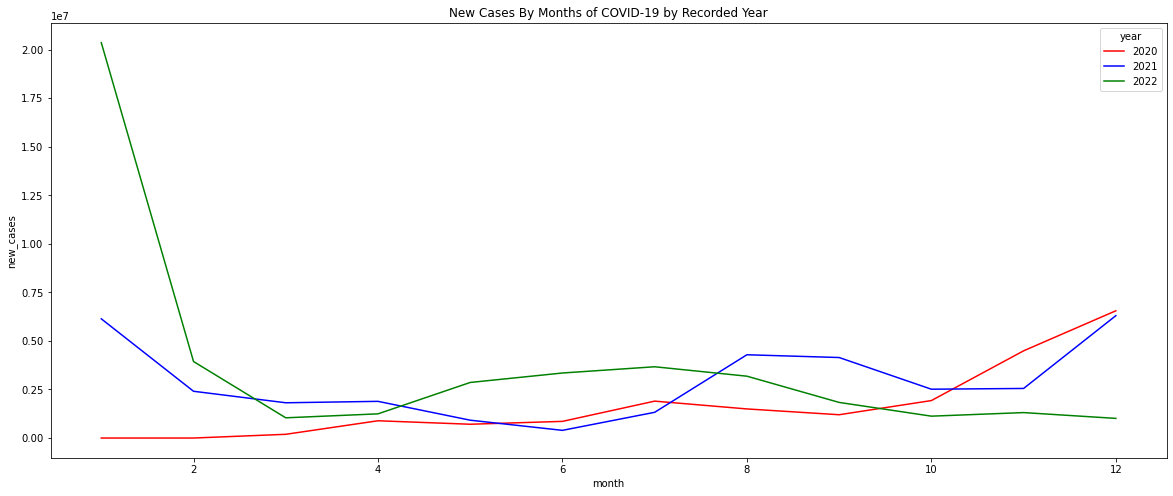

In [66]:
plt.figure(figsize=(20,8))
sns.lineplot(x="month", y=copy_grouped['new_cases'], hue="year", data=copy_grouped, palette = palette)
plt.title('New Cases By Months of COVID-19 by Recorded Year')
plt.show()

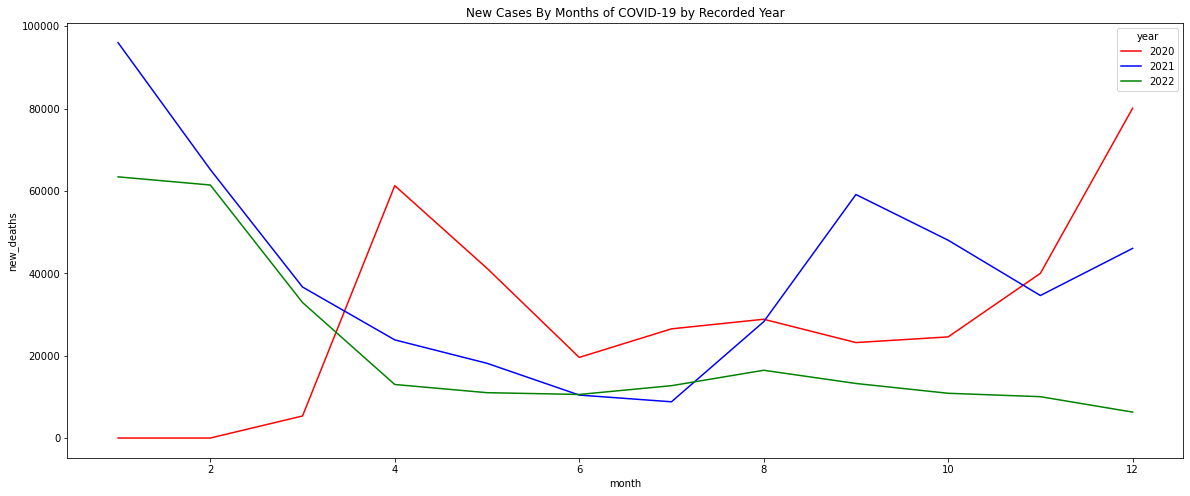

In [67]:
plt.figure(figsize=(20,8))
sns.lineplot(x="month", y=copy_grouped['new_deaths'], hue="year", data=copy_grouped, palette = palette)
plt.title('New Cases By Months of COVID-19 by Recorded Year')
plt.show()

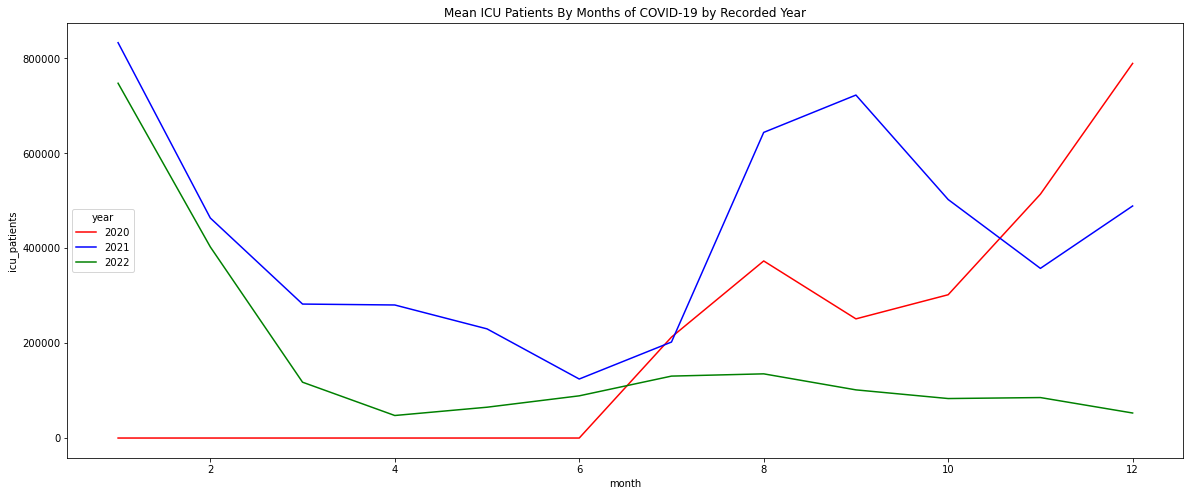

In [68]:
plt.figure(figsize=(20,8))
sns.lineplot(x="month", y=copy_grouped['icu_patients'], hue="year", data=copy_grouped, palette = palette)
plt.title('Mean ICU Patients By Months of COVID-19 by Recorded Year')
plt.show()

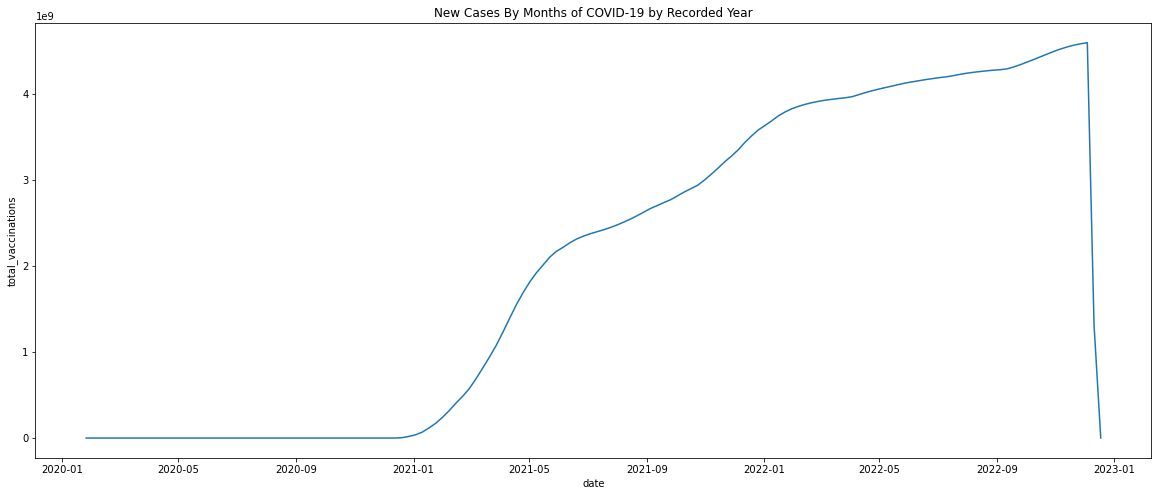

In [83]:
plt.figure(figsize=(20,8))
sns.lineplot(x="date", y='total_vaccinations', data=usa_df)
plt.title('New Cases By Months of COVID-19 by Recorded Year')
plt.show()

In [84]:
usa_df.to_csv("C:/Users/Micha/Desktop/Data Analysis Practice/COVID-19 Data Project/usa_df.csv")

In [85]:
copy_grouped.to_csv("C:/Users/Micha/Desktop/Data Analysis Practice/COVID-19 Data Project/year_month_aggregated.csv")

In [86]:
usa_df['new_cases'].sum()

99827628.0